In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Configure Seaborn for dark theme
sns.set(
    context='talk',
    style='dark',  # Set to 'dark' for a dark background
    palette='deep',
    font='sans-serif',
    rc={
        'figure.figsize': (15, 15),
        'axes.grid': True,
        'text.color': 'white',  # Set text color to white
        'axes.labelcolor': 'white',  # Set axis label color to white
        'xtick.color': 'white',  # Set x-tick color to white
        'ytick.color': 'white',  # Set y-tick color to white
    }
)

# Configure Matplotlib to match the dark theme
plt.rcParams.update({
    'axes.facecolor': 'black',  # Set the background color of the axes
    'figure.facecolor': 'black',  # Set the background color of the figure
    'savefig.facecolor': 'black',  # Set the color for saved figures
    'grid.color': 'gray',  # Set grid color to a lighter shade
    'axes.edgecolor': 'white'  # Set the border color to white
})

import warnings
warnings.filterwarnings("ignore")

In [30]:
df=pd.read_csv('/content/drive/MyDrive/Data Analysis Projects/Project 7/Census-Data.csv')
df.head()

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,...,1700,5600,66,39,74948,39709,21751,600759,178435,89679
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,...,1489,5559,47,6,66459,41367,27950,503223,160933,88978
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,...,658,1092,88635,103,16265,8923,6197,70703,41515,21019
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,51873,39839,12034,...,604,1171,20126,28,16938,9826,3077,87532,35561,17488
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,161393,117677,43716,...,958,11188,83,10,46062,29517,13962,304979,109818,61334


In [31]:
df.shape

(640, 25)

In [32]:
df.isnull().sum()

,0
District_code,0
State_name,0
District_name,0
Population,0
Male,0
Female,0
Literate,0
Workers,0
Male_Workers,0
Female_Workers,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   District_code         640 non-null    int64 
 1   State_name            640 non-null    object
 2   District_name         640 non-null    object
 3   Population            640 non-null    int64 
 4   Male                  640 non-null    int64 
 5   Female                640 non-null    int64 
 6   Literate              640 non-null    int64 
 7   Workers               640 non-null    int64 
 8   Male_Workers          640 non-null    int64 
 9   Female_Workers        640 non-null    int64 
 10  Cultivator_Workers    640 non-null    int64 
 11  Agricultural_Workers  640 non-null    int64 
 12  Household_Workers     640 non-null    int64 
 13  Hindus                640 non-null    int64 
 14  Muslims               640 non-null    int64 
 15  Christians            640 non-null    in

In [34]:
# Q. 1) How will you hide the indexes of the dataframe.

from IPython.display import HTML

html=df.to_html(index=False)

display(HTML(html))

District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,Cultivator_Workers,Agricultural_Workers,Household_Workers,Hindus,Muslims,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,34680,56759,7946,37128,823286,1700,5600,66,39,74948,39709,21751,600759,178435,89679
2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,55299,36630,29102,10110,736054,1489,5559,47,6,66459,41367,27950,503223,160933,88978
3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,20869,1645,1020,22882,19057,658,1092,88635,103,16265,8923,6197,70703,41515,21019
4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,51873,39839,12034,8266,3763,1222,10341,108239,604,1171,20126,28,16938,9826,3077,87532,35561,17488
5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,161393,117677,43716,54264,31583,3930,32604,431279,958,11188,83,10,46062,29517,13962,304979,109818,61334
6,JAMMU AND KASHMIR,Rajouri,642415,345351,297064,364109,290912,184752,106160,136527,24016,4656,221880,402879,983,15513,189,26,65921,35804,18576,404903,153165,83319
7,JAMMU AND KASHMIR,Kathua,616435,326109,290326,389204,200431,161548,38883,69533,21566,3952,540063,64234,1828,9551,24,16,91522,47694,24330,357864,160123,97684
8,JAMMU AND KASHMIR,Baramula,1008039,534733,473306,545149,304200,249581,54619,57495,62246,15084,30621,959185,1497,14770,140,29,107837,57932,48285,636524,239659,130513
9,JAMMU AND KASHMIR,Bandipore,392232,207680,184552,185979,149317,101380,47937,28232,32882,20484,8439,382006,572,555,44,17,35630,18644,12721,252378,90465,48802
10,JAMMU AND KASHMIR,Srinagar,1236829,651124,585705,748584,407188,333151,74037,12228,10408,20095,42540,1177342,2746,12187,285,74,176409,132727,121856,693238,351561,190330


In [35]:
# Q. 2) How can we set the caption / heading on the dataframe.

df.style.set_caption("This is the DataFrame Caption")

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,Cultivator_Workers,Agricultural_Workers,Household_Workers,Hindus,Muslims,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,34680,56759,7946,37128,823286,1700,5600,66,39,74948,39709,21751,600759,178435,89679
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,55299,36630,29102,10110,736054,1489,5559,47,6,66459,41367,27950,503223,160933,88978
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,20869,1645,1020,22882,19057,658,1092,88635,103,16265,8923,6197,70703,41515,21019
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,51873,39839,12034,8266,3763,1222,10341,108239,604,1171,20126,28,16938,9826,3077,87532,35561,17488
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,161393,117677,43716,54264,31583,3930,32604,431279,958,11188,83,10,46062,29517,13962,304979,109818,61334
5,6,JAMMU AND KASHMIR,Rajouri,642415,345351,297064,364109,290912,184752,106160,136527,24016,4656,221880,402879,983,15513,189,26,65921,35804,18576,404903,153165,83319
6,7,JAMMU AND KASHMIR,Kathua,616435,326109,290326,389204,200431,161548,38883,69533,21566,3952,540063,64234,1828,9551,24,16,91522,47694,24330,357864,160123,97684
7,8,JAMMU AND KASHMIR,Baramula,1008039,534733,473306,545149,304200,249581,54619,57495,62246,15084,30621,959185,1497,14770,140,29,107837,57932,48285,636524,239659,130513
8,9,JAMMU AND KASHMIR,Bandipore,392232,207680,184552,185979,149317,101380,47937,28232,32882,20484,8439,382006,572,555,44,17,35630,18644,12721,252378,90465,48802
9,10,JAMMU AND KASHMIR,Srinagar,1236829,651124,585705,748584,407188,333151,74037,12228,10408,20095,42540,1177342,2746,12187,285,74,176409,132727,121856,693238,351561,190330


In [36]:
df['State_name_']=pd.MultiIndex.from_product([['State Information'], df['State_name']])
df.head()

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,...,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50,State_name_
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,...,5600,66,39,74948,39709,21751,600759,178435,89679,"(State Information, JAMMU AND KASHMIR)"
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,...,5559,47,6,66459,41367,27950,503223,160933,88978,"(State Information, JAMMU AND KASHMIR)"
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,...,1092,88635,103,16265,8923,6197,70703,41515,21019,"(State Information, JAMMU AND KASHMIR)"
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,51873,39839,12034,...,1171,20126,28,16938,9826,3077,87532,35561,17488,"(State Information, JAMMU AND KASHMIR)"
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,161393,117677,43716,...,11188,83,10,46062,29517,13962,304979,109818,61334,"(State Information, JAMMU AND KASHMIR)"


In [37]:
df.drop('State_name_', axis=1, inplace=True)
df.head()

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,...,1700,5600,66,39,74948,39709,21751,600759,178435,89679
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,...,1489,5559,47,6,66459,41367,27950,503223,160933,88978
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,...,658,1092,88635,103,16265,8923,6197,70703,41515,21019
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,51873,39839,12034,...,604,1171,20126,28,16938,9826,3077,87532,35561,17488
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,161393,117677,43716,...,958,11188,83,10,46062,29517,13962,304979,109818,61334


In [38]:
#Q. 3) Show the records related with the districts - New Delhi , Lucknow , Jaipur.

df[df['District_name'].isin(['New Delhi', 'Lucknow', 'Jaipur'])]

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
93,94,NCT OF DELHI,New Delhi,142004,77942,64062,114179,59541,46940,12601,...,4852,2933,312,679,15942,17742,23934,76076,43913,21773
109,110,RAJASTHAN,Jaipur,6626178,3468507,3157671,4300965,2464893,1714947,749946,...,12708,18782,1020,81079,659389,455527,703673,4091148,1646480,884057
156,157,UTTAR PRADESH,Lucknow,4589838,2394476,2195362,3127260,1542806,1226399,316407,...,20493,23883,3877,4975,428121,378742,639260,2678289,1161686,685258


In [40]:
# Q. 4) Calculate state-wise :
# A. Total number of population.
# B. Total no. of the population with different religions.

df.head(2)

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,...,1700,5600,66,39,74948,39709,21751,600759,178435,89679
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,...,1489,5559,47,6,66459,41367,27950,503223,160933,88978


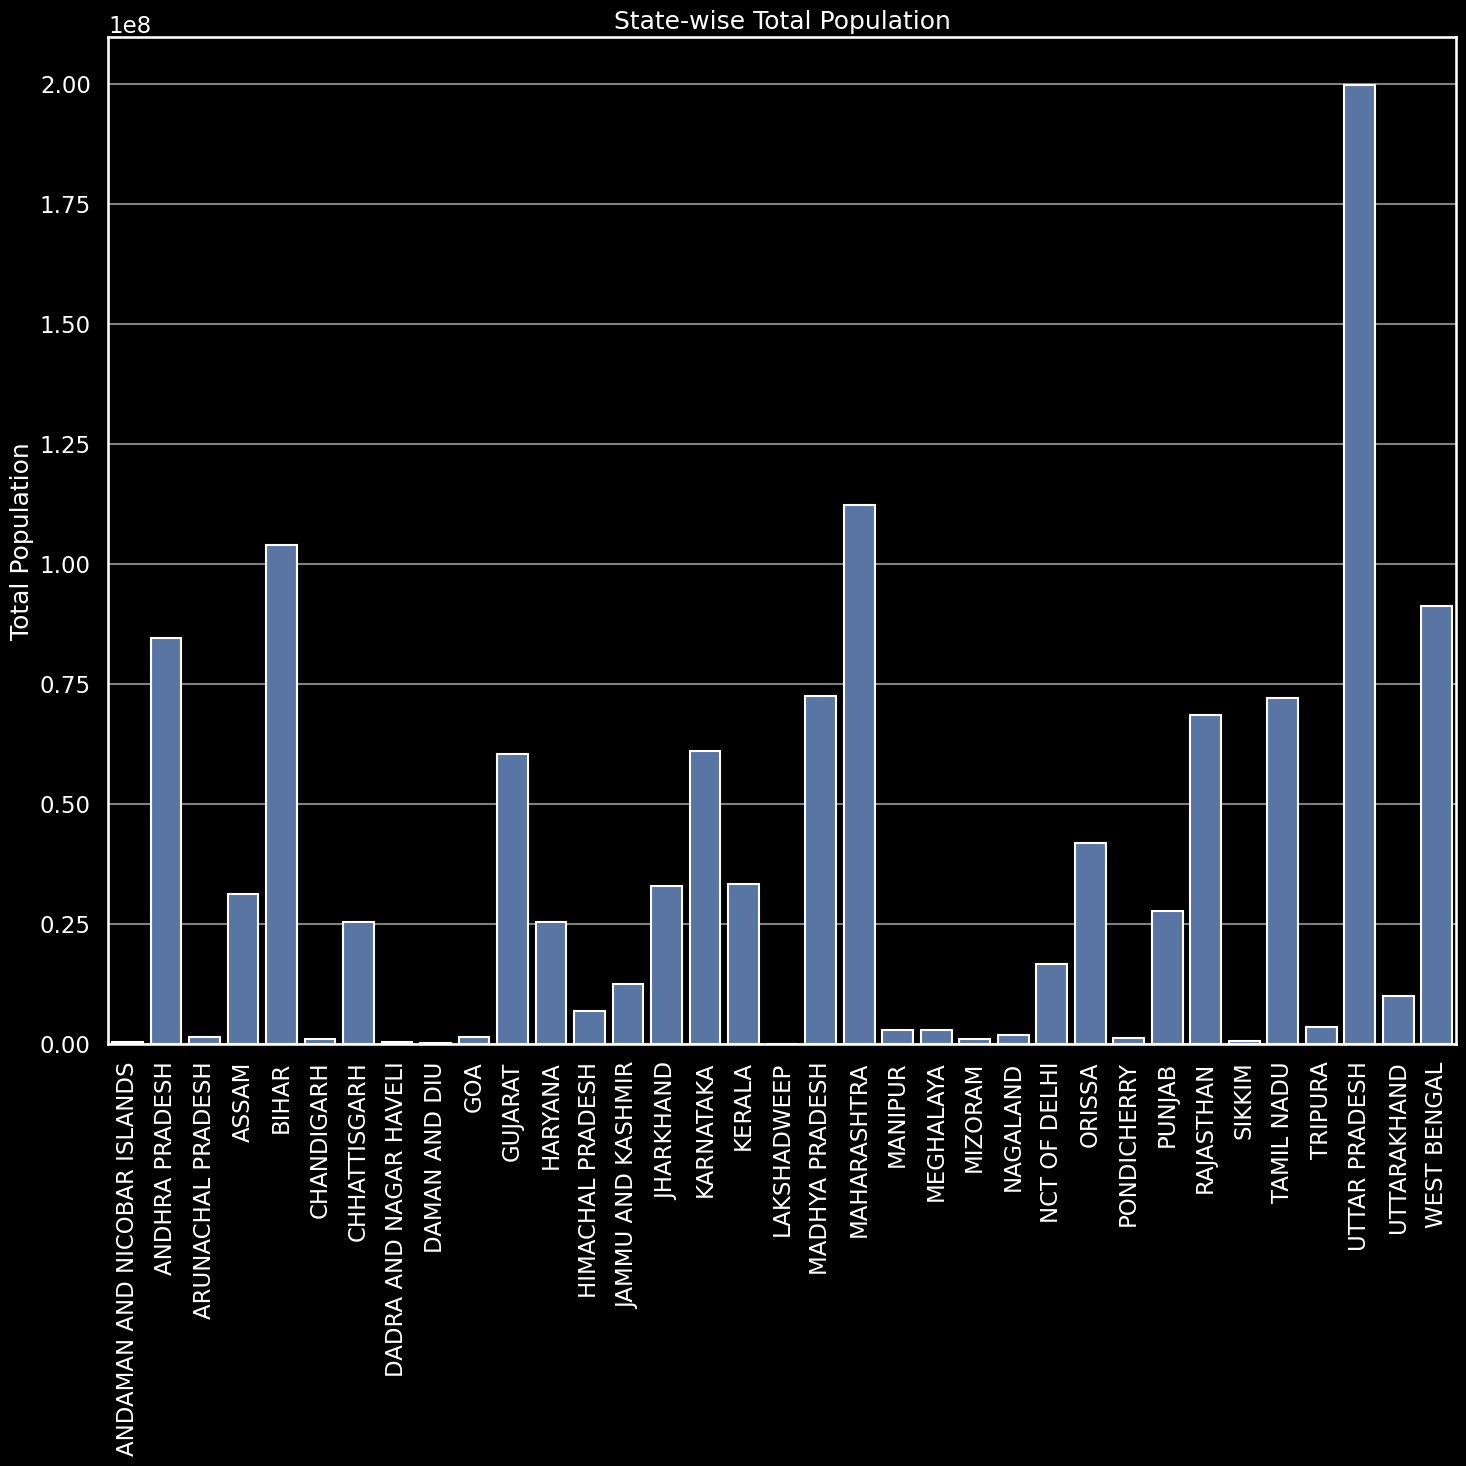

In [43]:
state_pop=df.groupby('State_name')['Population'].sum().reset_index(name='Total Population')

sns.barplot(data=state_pop, x='State_name', y='Total Population')
plt.title('State-wise Total Population')
plt.xlabel('')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [46]:
df_melted=df.melt(id_vars=['State_name'], value_vars=['Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains'],
                  var_name='Religion', value_name='Religion_Population')
df_melted

,State_name,Religion,Religion_Population
0,JAMMU AND KASHMIR,Hindus,37128
1,JAMMU AND KASHMIR,Hindus,10110
2,JAMMU AND KASHMIR,Hindus,22882
3,JAMMU AND KASHMIR,Hindus,10341
4,JAMMU AND KASHMIR,Hindus,32604
...,...,...,...
3835,PONDICHERRY,Jains,14
3836,PONDICHERRY,Jains,54
3837,ANDAMAN AND NICOBAR ISLANDS,Jains,0
3838,ANDAMAN AND NICOBAR ISLANDS,Jains,4


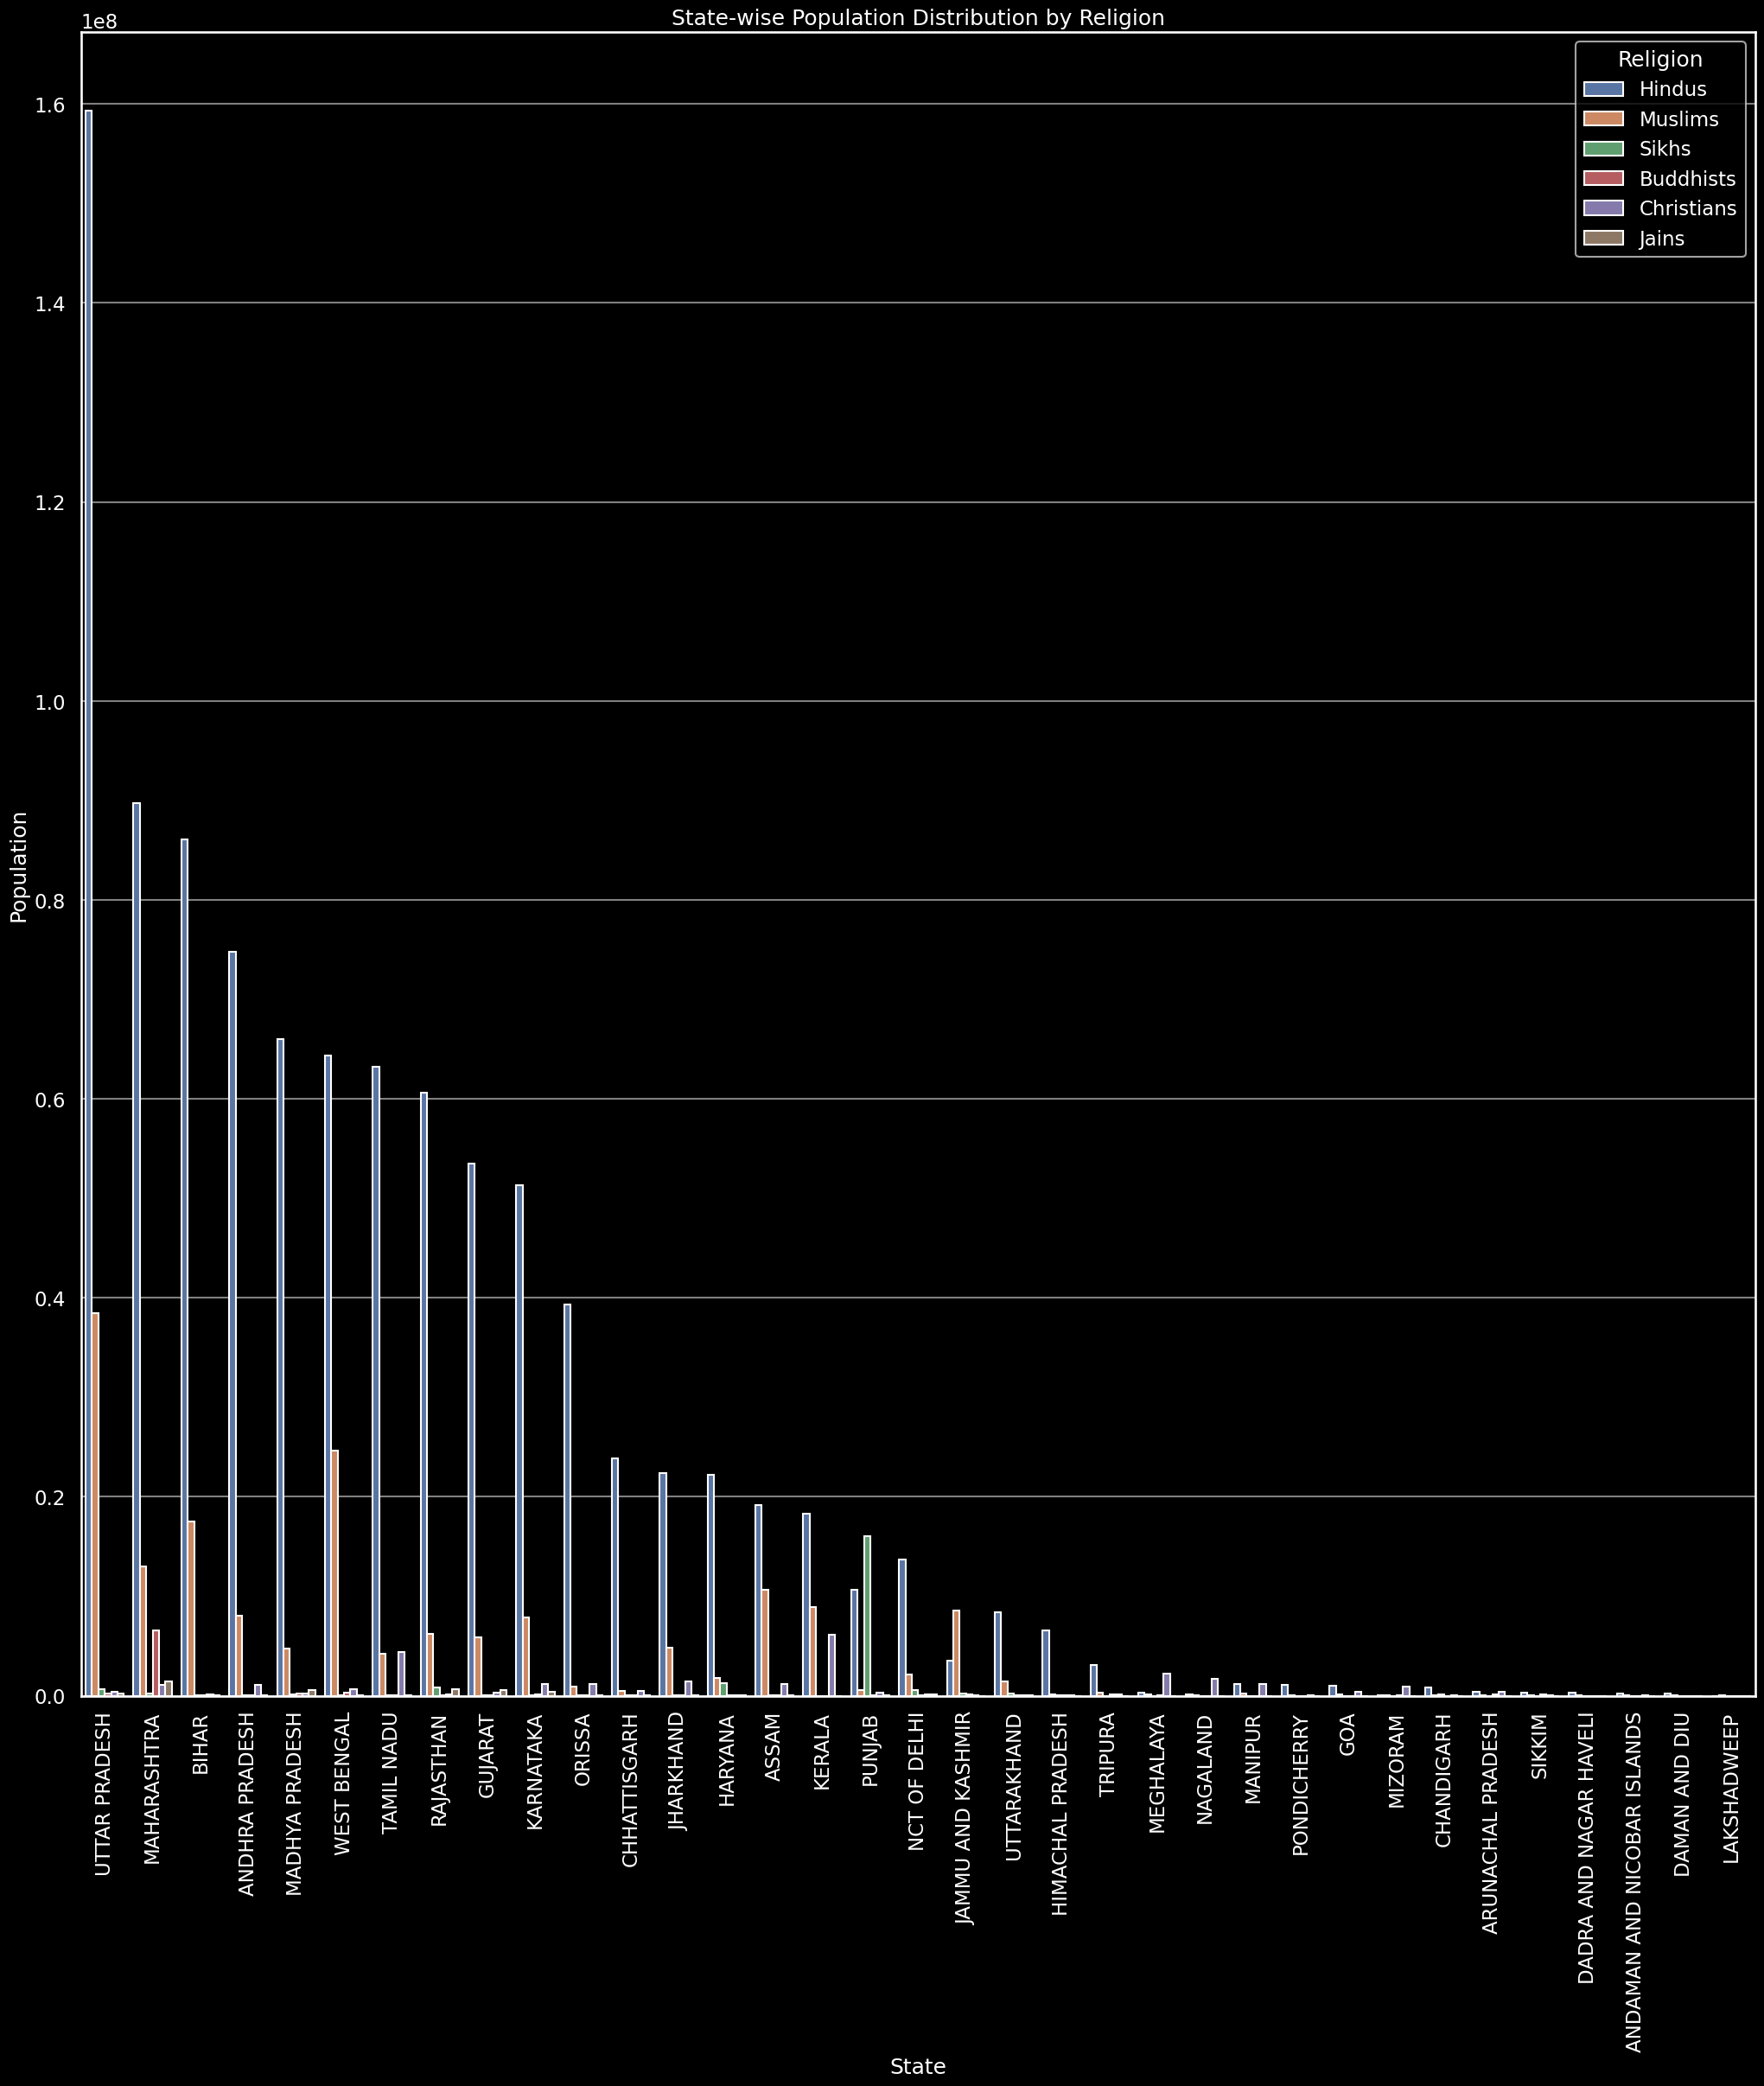

In [52]:
state_pop_rel=df_melted.groupby(['State_name', 'Religion'])['Religion_Population'].sum().sort_values(ascending=False).reset_index(name='Total Population')
plt.figure(figsize=(25, 25))
sns.barplot(x='State_name', y='Total Population', hue='Religion', data=state_pop_rel)
plt.title('State-wise Population Distribution by Religion')
plt.xlabel('State')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.legend(title='Religion')
plt.show()

In [56]:
df.State_name.unique()

array(['JAMMU AND KASHMIR', 'HIMACHAL PRADESH', 'PUNJAB', 'CHANDIGARH',
       'UTTARAKHAND', 'HARYANA', 'NCT OF DELHI', 'RAJASTHAN',
       'UTTAR PRADESH', 'BIHAR', 'SIKKIM', 'ARUNACHAL PRADESH',
       'NAGALAND', 'MANIPUR', 'MIZORAM', 'TRIPURA', 'MEGHALAYA', 'ASSAM',
       'WEST BENGAL', 'JHARKHAND', 'ORISSA', 'CHHATTISGARH',
       'MADHYA PRADESH', 'GUJARAT', 'DAMAN AND DIU',
       'DADRA AND NAGAR HAVELI', 'MAHARASHTRA', 'ANDHRA PRADESH',
       'KARNATAKA', 'GOA', 'LAKSHADWEEP', 'KERALA', 'TAMIL NADU',
       'PONDICHERRY', 'ANDAMAN AND NICOBAR ISLANDS'], dtype=object)

In [58]:
# Q. 5) How many Male Workers were there in Maharashtra state ?

df[df['State_name'] == 'MAHARASHTRA']['Male_Workers'].sum()

32616875

In [59]:
# Q. 6) How to set a column as index of the dataframe ?
df.head()

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,...,1700,5600,66,39,74948,39709,21751,600759,178435,89679
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,...,1489,5559,47,6,66459,41367,27950,503223,160933,88978
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,...,658,1092,88635,103,16265,8923,6197,70703,41515,21019
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,51873,39839,12034,...,604,1171,20126,28,16938,9826,3077,87532,35561,17488
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,161393,117677,43716,...,958,11188,83,10,46062,29517,13962,304979,109818,61334


In [60]:
df.set_index('State_name')

,District_code,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,Cultivator_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
State_name,,,,,,,,,,,,,,,,,,,,,
JAMMU AND KASHMIR,1,Kupwara,870354,474190,396164,439654,229064,190899,38165,34680,...,1700,5600,66,39,74948,39709,21751,600759,178435,89679
JAMMU AND KASHMIR,2,Badgam,753745,398041,355704,335649,214866,162578,52288,55299,...,1489,5559,47,6,66459,41367,27950,503223,160933,88978
JAMMU AND KASHMIR,3,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,20869,...,658,1092,88635,103,16265,8923,6197,70703,41515,21019
JAMMU AND KASHMIR,4,Kargil,140802,77785,63017,86236,51873,39839,12034,8266,...,604,1171,20126,28,16938,9826,3077,87532,35561,17488
JAMMU AND KASHMIR,5,Punch,476835,251899,224936,261724,161393,117677,43716,54264,...,958,11188,83,10,46062,29517,13962,304979,109818,61334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PONDICHERRY,636,Mahe,41816,19143,22673,36470,11802,9093,2709,43,...,958,3,21,14,8773,5711,4475,19760,12543,9428
PONDICHERRY,637,Karaikal,200222,97809,102413,154916,68301,53139,15162,2372,...,18391,46,63,54,29456,15930,18998,102333,60089,37434
ANDAMAN AND NICOBAR ISLANDS,638,Nicobars,36842,20727,16115,25332,17125,12714,4411,322,...,26077,343,119,0,6325,3668,1300,18786,12088,5922


In [61]:
# Q. 7a) Add a Suffix to the column names.

df=df.add_suffix('_data')
df.head()

,District_code_data,State_name_data,District_name_data,Population_data,Male_data,Female_data,Literate_data,Workers_data,Male_Workers_data,Female_Workers_data,...,Christians_data,Sikhs_data,Buddhists_data,Jains_data,Secondary_Education_data,Higher_Education_data,Graduate_Education_data,Age_Group_0_29_data,Age_Group_30_49_data,Age_Group_50_data
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,...,1700,5600,66,39,74948,39709,21751,600759,178435,89679
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,...,1489,5559,47,6,66459,41367,27950,503223,160933,88978
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,...,658,1092,88635,103,16265,8923,6197,70703,41515,21019
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,51873,39839,12034,...,604,1171,20126,28,16938,9826,3077,87532,35561,17488
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,161393,117677,43716,...,958,11188,83,10,46062,29517,13962,304979,109818,61334


In [62]:
# Q. 7b) Add a Prefix to the column names.

df=df.add_prefix('Data_')
df

,Data_District_code_data,Data_State_name_data,Data_District_name_data,Data_Population_data,Data_Male_data,Data_Female_data,Data_Literate_data,Data_Workers_data,Data_Male_Workers_data,Data_Female_Workers_data,...,Data_Christians_data,Data_Sikhs_data,Data_Buddhists_data,Data_Jains_data,Data_Secondary_Education_data,Data_Higher_Education_data,Data_Graduate_Education_data,Data_Age_Group_0_29_data,Data_Age_Group_30_49_data,Data_Age_Group_50_data
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,...,1700,5600,66,39,74948,39709,21751,600759,178435,89679
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,...,1489,5559,47,6,66459,41367,27950,503223,160933,88978
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,...,658,1092,88635,103,16265,8923,6197,70703,41515,21019
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,51873,39839,12034,...,604,1171,20126,28,16938,9826,3077,87532,35561,17488
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,161393,117677,43716,...,958,11188,83,10,46062,29517,13962,304979,109818,61334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,636,PONDICHERRY,Mahe,41816,19143,22673,36470,11802,9093,2709,...,958,3,21,14,8773,5711,4475,19760,12543,9428
636,637,PONDICHERRY,Karaikal,200222,97809,102413,154916,68301,53139,15162,...,18391,46,63,54,29456,15930,18998,102333,60089,37434
637,638,ANDAMAN AND NICOBAR ISLANDS,Nicobars,36842,20727,16115,25332,17125,12714,4411,...,26077,343,119,0,6325,3668,1300,18786,12088,5922
638,639,ANDAMAN AND NICOBAR ISLANDS,North AND Middle Andaman,105597,54861,50736,78683,38579,30612,7967,...,21870,77,84,4,12707,10042,5133,57350,30741,17464
